In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from VAE import *
from train_VAE import *
%load_ext autoreload
%autoreload 2

Using device: cuda


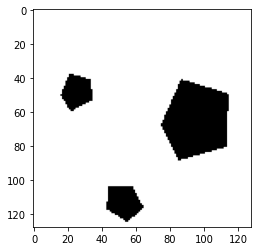

In [2]:
data = microstructure_dataset(128, 'simple')
#data = LIST_dataset(128)
img, label = data.__getitem__(100)
loaders = get_loaders(data, 8)
plt.imshow(img[0,:,:], cmap='Greys')

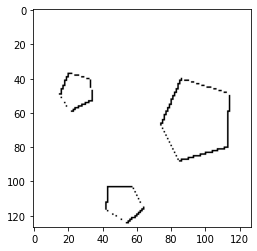

In [8]:
plt.imshow(torch.abs(img[0,:-1,:-1]-img[0,1:,1:]),cmap='Greys')

Autoencoder

In [3]:
ae = Autoencoder(latent_dims=256)

In [30]:
args = {'lr' : 0.000001, 'epochs' : 600, 'dev' : dev, 'name' : 'AE_128_256_wide_narrow3'}

In [14]:
ae = load_network(ae, args['name'], args)

In [ ]:
losses_train, losses_val = train(ae, loaders, args)

$\beta$-VAE

In [29]:
args = {'lr' : 0.00001, 'epochs' : 200, 'dev' : dev, 'name' : 'Edge_0_VAE_128_256_1'}

In [10]:
vae = BetaVariationalAutoencoder(latent_dims = 256, beta = 1.)

In [24]:
vae = load_network(vae, args['name'], args)

In [30]:
losses_train, losses_val_r, losses_val_sp, losses_val_kl = train(vae, loaders, args, alpha=1.)

Epoch: 0 mean train loss:  2065.8508342285
mean val. rec. loss:  802.0147153320 mean val. sp. loss:  787.7065063477 mean val. KL loss:  446.4774411621
Epoch: 1 mean train loss:  2061.7472684326
mean val. rec. loss:  803.2447690430 mean val. sp. loss:  789.0503637695 mean val. KL loss:  453.7416506348
Epoch: 2 mean train loss:  2046.6373804932
mean val. rec. loss:  809.8280698242 mean val. sp. loss:  792.4966220703 mean val. KL loss:  448.1440700684
Epoch: 3 mean train loss:  2097.0202189941
mean val. rec. loss:  1461.6254082031 mean val. sp. loss:  1028.8233330078 mean val. KL loss:  448.5314519043
Epoch: 4 mean train loss:  2139.1967683105
mean val. rec. loss:  829.5125190430 mean val. sp. loss:  815.1348574219 mean val. KL loss:  439.8628349609
Epoch: 5 mean train loss:  2068.3814467773
mean val. rec. loss:  800.9197763672 mean val. sp. loss:  794.7569731445 mean val. KL loss:  455.4230583496
Epoch: 6 mean train loss:  2069.0173325195
mean val. rec. loss:  889.3399868164 mean val. sp

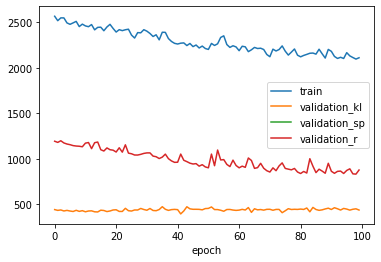

In [28]:
plt.plot(losses_train)
plt.plot(losses_val_kl)
plt.plot(losses_val_sp)
plt.plot(losses_val_r)
plt.xlabel('epoch')
plt.legend(['train', 'validation_kl', 'validation_sp', 'validation_r'])

In [24]:
train_data = next(iter(loaders['train']))[0].to(args['dev'])

In [8]:
vae = vae.to(args['dev'])

In [9]:
y = vae(train_data)

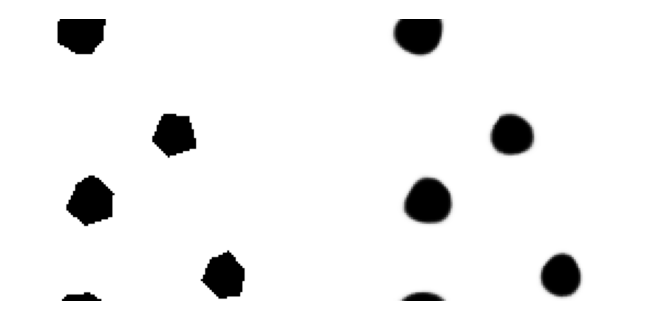

In [19]:
I = 2
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(4, 2), dpi=200)
axs.flat[0].imshow(train_data[I][0].detach().cpu().numpy(), cmap='Greys')
axs.flat[1].imshow(y[I][0].detach().cpu().numpy(), cmap='Greys')
axs.flat[0].set_axis_off()
axs.flat[1].set_axis_off()

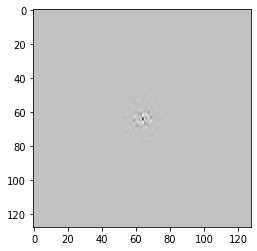

In [31]:
plt.imshow(torch.fft.fftshift(torch.fft.fft2(train_data[0][0], norm='ortho')).detach().cpu().real.numpy(), cmap='Greys')

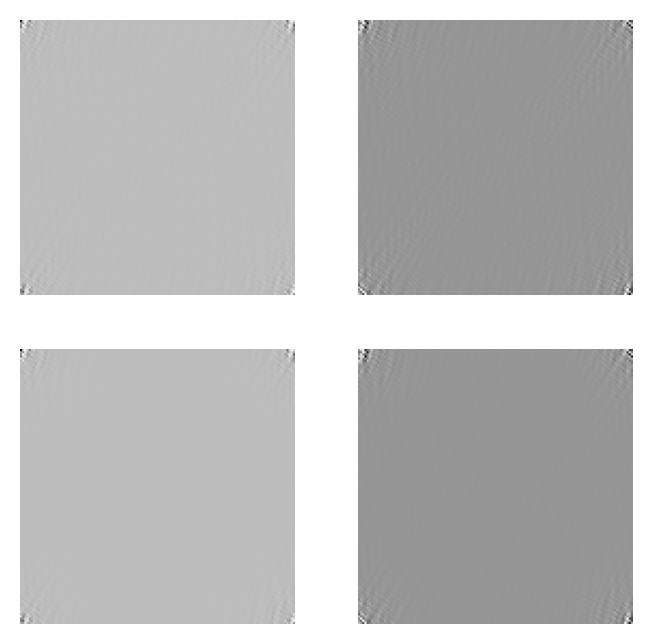

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(4, 4), dpi=200)
axs.flat[0].imshow(torch.fft.fft2(train_data[I][0]).detach().cpu().real.numpy(), cmap='Greys')
axs.flat[1].imshow(torch.fft.fft2(train_data[I][0]).detach().cpu().imag.numpy(), cmap='Greys')
axs.flat[2].imshow(torch.fft.fft2(y[I][0]).detach().cpu().real.numpy(), cmap='Greys')
axs.flat[3].imshow(torch.fft.fft2(y[I][0]).detach().cpu().imag.numpy(), cmap='Greys')
axs.flat[0].set_axis_off()
axs.flat[1].set_axis_off()
axs.flat[2].set_axis_off()
axs.flat[3].set_axis_off()

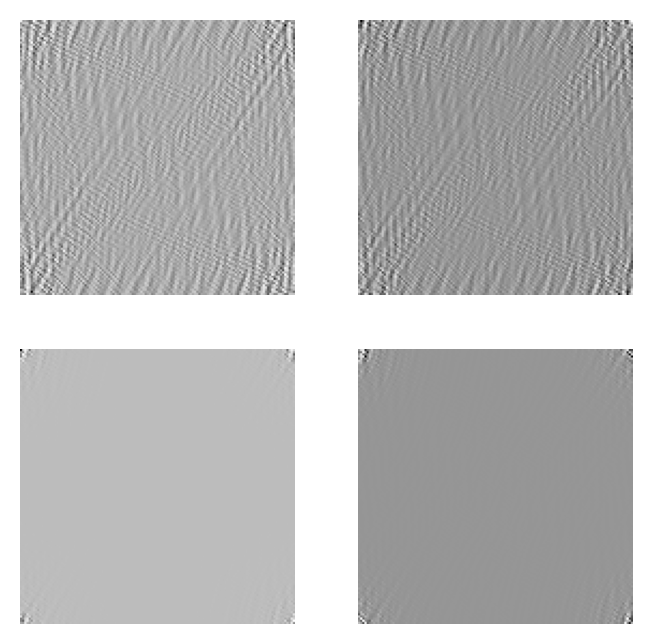

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(4, 4), dpi=200)
axs.flat[0].imshow(torch.fft.fft2(train_data[I][0]).detach().cpu().real.numpy()-torch.fft.fft2(y[I][0]).detach().cpu().real.numpy(), cmap='Greys')
axs.flat[1].imshow(torch.fft.fft2(train_data[I][0]).detach().cpu().imag.numpy()-torch.fft.fft2(y[I][0]).detach().cpu().imag.numpy(), cmap='Greys')
axs.flat[2].imshow(torch.fft.fft2(y[I][0]).detach().cpu().real.numpy(), cmap='Greys')
axs.flat[3].imshow(torch.fft.fft2(y[I][0]).detach().cpu().imag.numpy(), cmap='Greys')
axs.flat[0].set_axis_off()
axs.flat[1].set_axis_off()
axs.flat[2].set_axis_off()
axs.flat[3].set_axis_off()

In [22]:
dif = torch.fft.fft2(train_data[I][0]).detach().cpu()-torch.fft.fft2(y[I][0]).detach().cpu()
rec = torch.fft.ifft2(dif)

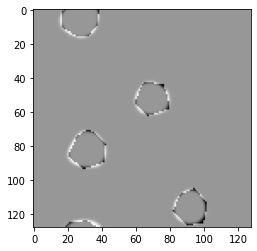

In [26]:
plt.imshow(rec.real,cmap='Greys')